In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [2]:
# import the dataset
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')


In [4]:
# m double checking the size
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (464809, 15)
y_train shape: (464809, 1)
X_test shape: (116203, 15)
y_test shape: (116203, 1)


In [5]:
# train the decision tree model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [6]:
y_pred = tree_clf.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1     0.9140    0.9139    0.9140     42557
           2     0.9241    0.9249    0.9245     56500
           3     0.8759    0.8642    0.8700      7121
           4     0.6710    0.6825    0.6767       526
           5     0.7630    0.7584    0.7607      1995
           6     0.7770    0.7839    0.7804      3489
           7     0.9332    0.9395    0.9363      4015

    accuracy                         0.9095    116203
   macro avg     0.8369    0.8382    0.8375    116203
weighted avg     0.9095    0.9095    0.9095    116203



In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9094601688424567


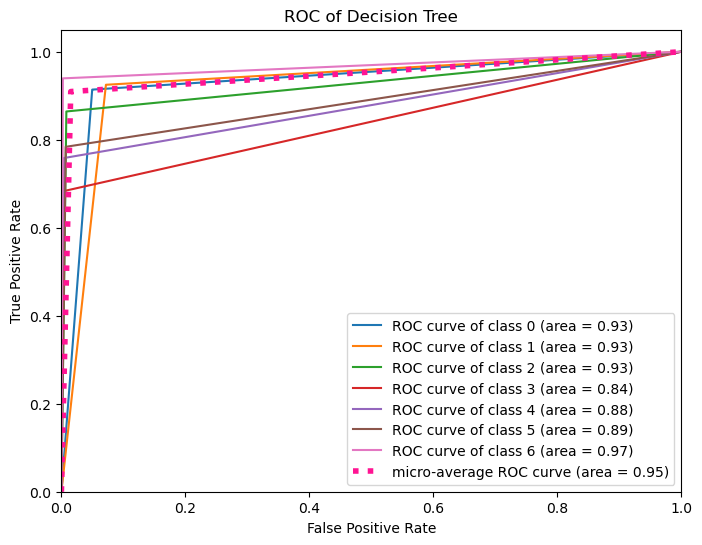

In [8]:
# Note: Use predict_proba to get the probabilities for the positive class
y_pred_proba = tree_clf.predict_proba(X_test)[:, 1]

# Binarize the output classes for the multiclass case
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calculate probabilities for each class
y_pred_proba = tree_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [9]:


from sklearn.metrics import roc_auc_score
# Calculate the micro-average AUROC
micro_average_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='micro')
print('Micro-average AUROC:', micro_average_auc)

Micro-average AUROC: 0.9471898587247283


In [16]:

max_depths = range(1, 100, 5)
min_samples_leafs = range(1, 200, 10)

# Arrays to store accuracies
train_acc_depth, test_acc_depth = [], []
train_acc_leaf, test_acc_leaf = [], []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_acc_depth.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc_depth.append(accuracy_score(y_test, clf.predict(X_test)))

for min_samples_leaf in min_samples_leafs:
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    train_acc_leaf.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc_leaf.append(accuracy_score(y_test, clf.predict(X_test)))

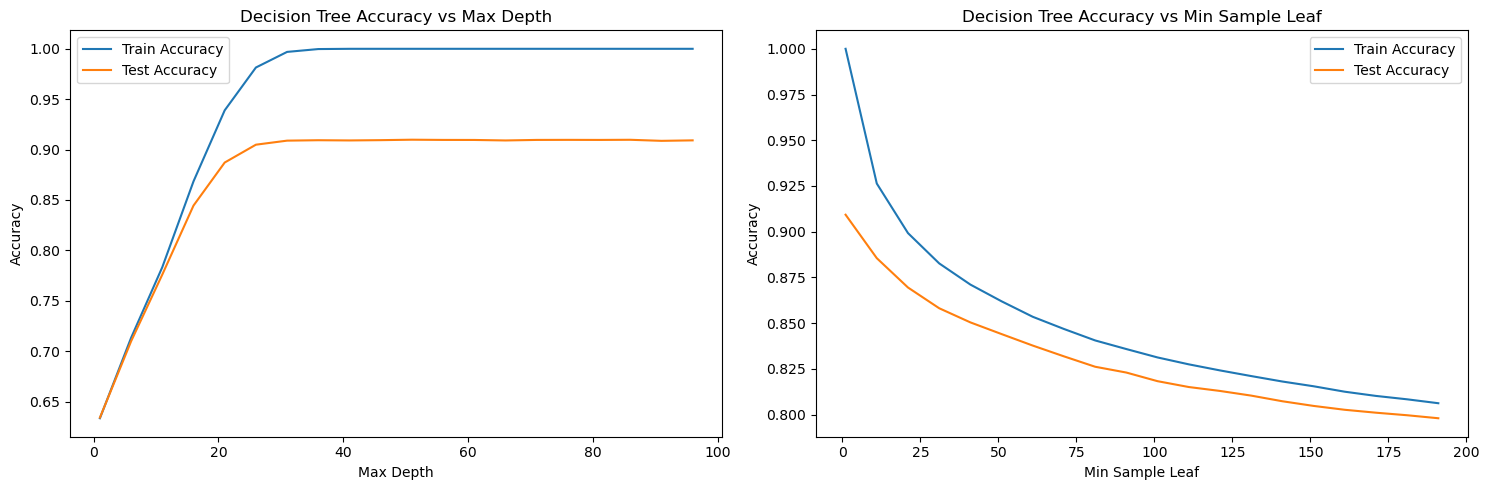

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for varying max_depth
axes[0].plot(max_depths, train_acc_depth, label='Train Accuracy')
axes[0].plot(max_depths, test_acc_depth, label='Test Accuracy')
axes[0].set_title('Decision Tree Accuracy vs Max Depth')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot for varying min_samples_leaf
axes[1].plot(min_samples_leafs, train_acc_leaf, label='Train Accuracy')
axes[1].plot(min_samples_leafs, test_acc_leaf, label='Test Accuracy')
axes[1].set_title('Decision Tree Accuracy vs Min Sample Leaf')
axes[1].set_xlabel('Min Sample Leaf')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

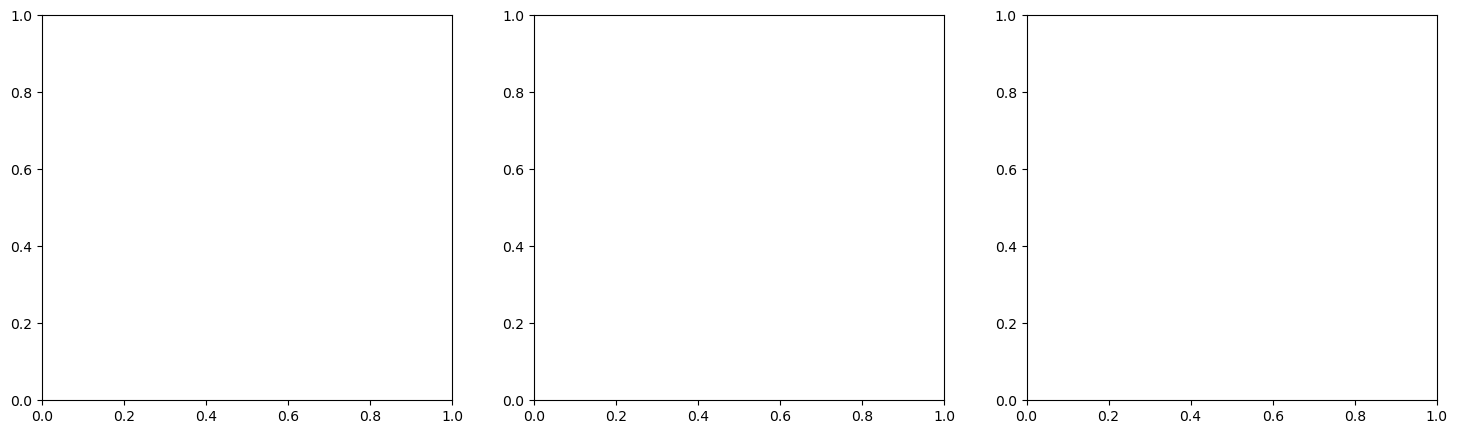

In [14]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for varying max_depth
axes[0].plot(min_samples_leafs, train_acc_depth, label='Train Accuracy')
axes[0].plot(min_samples_leafs, test_acc_depth, label='Test Accuracy')
axes[0].set_title('Decision Tree Accuracy vs Min Sample Leaf')
axes[0].set_xlabel('Min Sample Leaf')
axes[0].set_ylabel('Accuracy')
axes[0].legend()